In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rejection_sampling(N, a=2, g_sigma=3):
    samples = []
    count_accepted = 0

    while len(samples) < N:
        x = np.random.normal(0, g_sigma)
        u = np.random.uniform(0, 1)
        if u < p(x, a) / (g(x, sigma=g_sigma) * (a**2 / 2)):
            samples.append(x)
            count_accepted += 1

    success_probability = count_accepted / (len(samples) + (count_accepted - len(samples)))
    return samples, success_probability

In [3]:
def p(x, a=2):
    if abs(x) < a:
        return 0.5*(a**2-x**2)
    return 0

def g(x, mu=0, sigma=3):
    return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-mu)/sigma)**2)

Success probability: 1.0


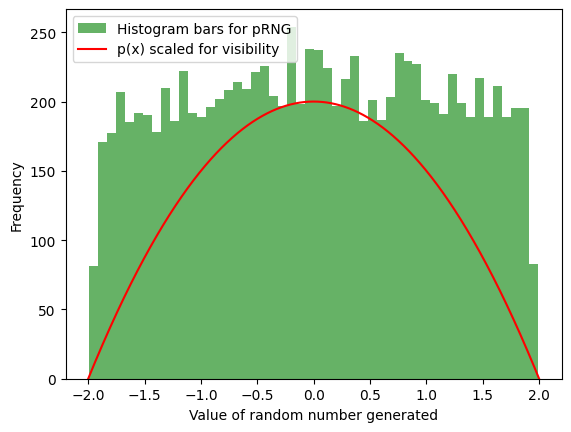

In [4]:
N = 10000
samples, success_prob = rejection_sampling(N)
print("Success probability: " + str(success_prob))

plt.hist(samples, bins=50, alpha=0.6, color='g', label='Histogram bars for pRNG')
x = np.linspace(-2, 2, 1000)
plt.plot(x, [100*p(xi) for xi in x], 'r-', label='p(x) scaled for visibility')
plt.xlabel('Value of random number generated')
plt.ylabel('Frequency')
plt.legend()
plt.show()